In [1]:
# Third party libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

# User created files
import f_helpers
import a_helpers

In [2]:
%reload_ext autoreload
%autoreload 2

## Most Important Cities Notebook

The purpose of this notebook is to determine which city or cities are the most important. While it is important to ask which city has the highest sale amount, other factors need to be considered, such as order frequency, average order amount, diversity of items ordered, etc. Visualizations and an analysis of the data follow.

### Step 1: Obtain the Data

We will obtain and clean the data from the SQL queries that were used to gather the data into the desired form. The SQL queries that were used can be found in `queries/most_important_cities`. To see how the Pandas DataFrames were created from the queries, please view the `f_helpers.py` file.

In [30]:
df_dict = f_helpers.table_to_df()

In [32]:
print (df_dict.keys())

dict_keys(['city_unique_items', 'city_subcategory_sale_counts', 'city_sales_dates', 'city_unique_product_subcategories', 'sales_info_city'])


In [33]:
# Short for city_sales_dates
csd_df = df_dict['city_sales_dates'].copy()

# Short for city_unique_items
cui_df = df_dict['city_unique_items'].copy()

# Short for city_subcategory_sale_counts
cssc_df = df_dict['city_subcategory_sale_counts'].copy()

# Short for city_unique_product_subcategories
cups_df = df_dict['city_unique_product_subcategories'].copy()

# Short for sales_info_city
sic_df = df_dict['sales_info_city'].copy()

In [34]:
csd_df = csd_df.rename(columns = {
    0: 'city',
    1: 'subtotal',
    2: 'year',
    3: 'month',
    4: 'day'
})

In [35]:
cui_df = cui_df.rename(columns = { 0: 'city', 1: 'unique_items_purchased' })

In [36]:
cssc_df = cssc_df.rename(columns = { 
    0: 'city', 
    1: 'product_id', 
    2: 'product_subcategory_id', 
    3: 'count', 
    4: 'standard_cost', 
    5: 'list_price' 
})

In [37]:
cups_df = cups_df.rename(columns = { 0: 'city', 1: 'unique_subcategories' })

In [38]:
sic_df = sic_df.rename(columns = { 0: 'city', 1: 'orders_total', 2: 'sum_total', 3: 'avg_sale_amount' })

### Step 2: Visualizing the Data

Now, we will begin an analysis of the data.

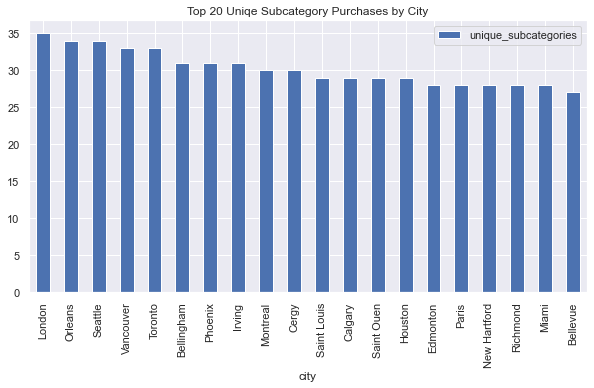

In [39]:
cups_df.head(20).set_index('city').plot(
    kind = 'bar', 
    figsize = (10, 5),
)
plt.title('Top 20 Uniqe Subcategory Purchases by City')
plt.show()

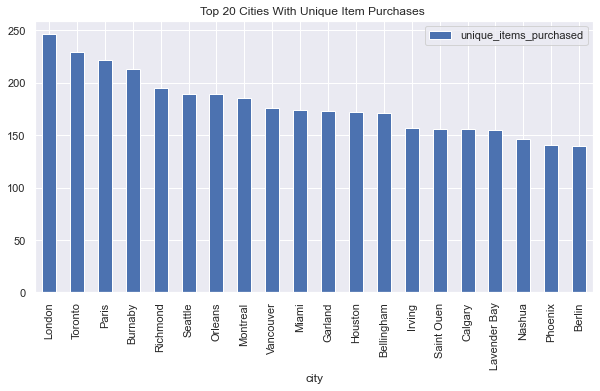

In [40]:
cui_df.head(20).set_index('city').plot(
    kind = 'bar', 
    figsize = (10, 5),
)
plt.title('Top 20 Cities With Unique Item Purchases ')
plt.show()

<AxesSubplot:title={'center':'Top 20 Sales Amounts in USD per City'}, xlabel='sum_total', ylabel='city'>

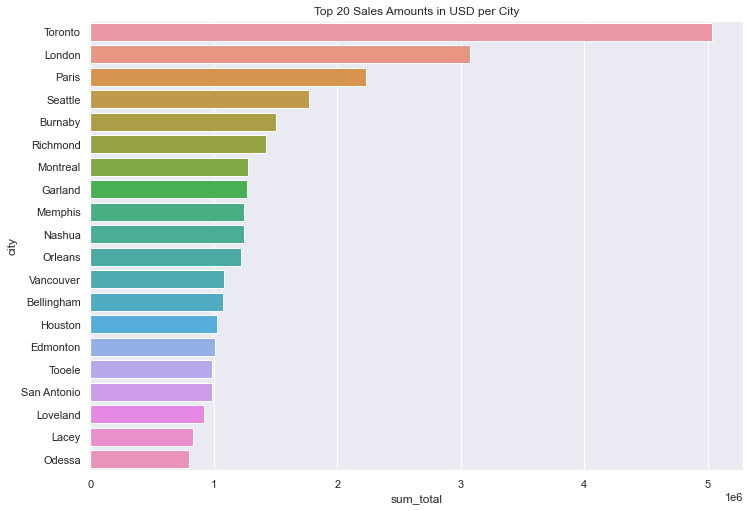

In [41]:
sns.set(rc = { 'figure.figsize':(11.7,8.27) }) # Sets figure size.

plt.title('Top 20 Sales Amounts in USD per City')

sns.barplot(
    data = sic_df.head(20),
    x = 'sum_total',
    y = 'city',
    orient = 'h'
)

<AxesSubplot:title={'center':'Top 20 Average Sales Amounts per City'}, xlabel='avg_sale_amount', ylabel='city'>

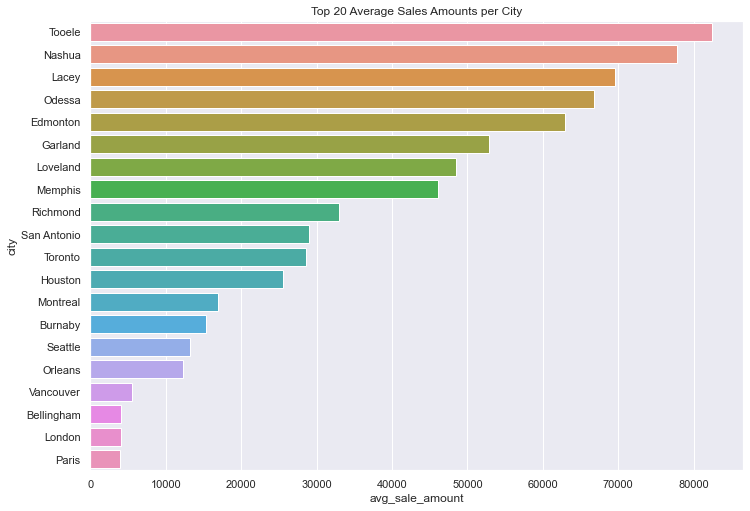

In [42]:
sns.set(rc = { 'figure.figsize':(11.7,8.27) }) # Sets figure size.

plt.title('Top 20 Average Sales Amounts per City')

sns.barplot(
    data = sic_df.head(20).sort_values('avg_sale_amount', ascending = False),
    x = 'avg_sale_amount',
    y = 'city',
    orient = 'h'
)

<AxesSubplot:title={'center':'Top 20 Number of Sales per City'}, xlabel='orders_total', ylabel='city'>

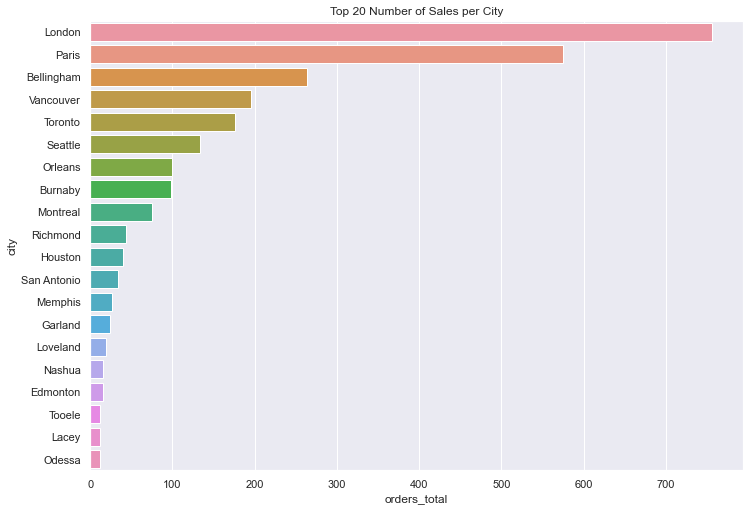

In [43]:
sns.set(rc = { 'figure.figsize':(11.7,8.27) }) # Sets figure size.

plt.title('Top 20 Number of Sales per City')

sns.barplot(
    data = sic_df.head(20).sort_values('orders_total', ascending = False),
    x = 'orders_total',
    y = 'city',
    orient = 'h'
)

In [44]:
sic_df.head(20)

,city,orders_total,sum_total,avg_sale_amount
0,Toronto,176,5034269.59,28603.80
1,London,756,3071176.64,4062.40
2,Paris,575,2233808.20,3884.88
3,Seattle,134,1767307.65,13188.86
4,Burnaby,98,1503463.85,15341.47
5,Richmond,43,1419263.50,33006.13
6,Montreal,75,1274666.84,16995.56
7,Garland,24,1267787.04,52824.46
8,Memphis,27,1246122.20,46152.67
9,Nashua,16,1244107.35,77756.71


In [45]:
# Need to convert standard_cost and list_price to floats
cssc_df.dtypes

city                      object
product_id                 int64
product_subcategory_id     int64
count                      int64
standard_cost             object
list_price                object
dtype: object

In [46]:
cssc_df['standard_cost'] = cssc_df['standard_cost'].astype(float)
cssc_df['list_price'] = cssc_df['list_price'].astype(float)

In [47]:
# This function is in the notebook because it references a table declared in the notebook.
# Gives the average list_price of the product subcategory alongside the count that the city ordered.

def city_subcat_info(city):
   
    df = pd.merge(
        cssc_df[cssc_df['city'] == city].groupby('product_subcategory_id').sum()['count'],
        cssc_df.groupby('product_subcategory_id').mean()['list_price'],
        how = 'inner',
        on = 'product_subcategory_id'
    )
    
    return df

In [52]:
london_subcat_info_df = city_subcat_info('London')
london_subcat_info_df['percent_of_total'] = (london_subcat_info_df['count'] / london_subcat_info_df['count'].sum())

london_subcat_info_df.sort_values('percent_of_total', ascending = False)

,count,list_price,percent_of_total
product_subcategory_id,,,
31,1230,34.990000,0.169492
2,1096,1620.044625,0.151027
1,662,1861.521144,0.091222
37,581,18.667801,0.080061
28,533,7.615316,0.073446
21,523,51.837215,0.072068
3,427,1570.341581,0.058840
19,348,8.990000,0.047954
20,242,28.074746,0.033347


In [50]:
toronto_subcat_info_df = city_subcat_info('Toronto')
toronto_subcat_info_df['percent_of_total'] = (toronto_subcat_info_df['count'] / toronto_subcat_info_df['count'].sum())

toronto_subcat_info_df.sort_values('percent_of_total', ascending = False)

,count,list_price,percent_of_total
product_subcategory_id,,,
2,1659,1620.044625,0.192236
1,960,1861.521144,0.111240
31,880,34.990000,0.101970
21,827,51.837215,0.095829
14,619,644.528264,0.071727
20,410,28.074746,0.047509
12,403,649.589096,0.046698
3,299,1570.341581,0.034647
19,288,8.990000,0.033372


In [59]:
csd_df['subtotal'] = csd_df['subtotal'].astype(float)

In [60]:
csd_df

,city,subtotal,year,month,day
0,Austell,20565.6206,2011.0,5.0,31.0
1,Suwanee,1294.2529,2011.0,5.0,31.0
2,Toronto,32726.4786,2011.0,5.0,31.0
3,Toronto,28832.5289,2011.0,5.0,31.0
4,Trabuco Canyon,419.4589,2011.0,5.0,31.0
...,...,...,...,...,...
31460,Everett,42.2800,2014.0,6.0,30.0
31461,Newton,84.9600,2014.0,6.0,30.0
31462,Oak Bay,74.9800,2014.0,6.0,30.0
31463,Sooke,30.9700,2014.0,6.0,30.0
